# Welltory COVID-19 and Wearables Dataset Exploratory Data Analysis
Importing necessary modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading Dataset
First we will read the dataset into memory. All dataframes are stored inside a dictionary "dfs".

Link to dataset: https://github.com/Welltory/hrv-covid19

In [ ]:
FILENAMES = ['participants','blood_pressure','heart_rate','surveys','scales_description','wearables','weather']
URL = 'https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/'
EXTENSION = '.csv'

dfs = {}

for fn in FILENAMES:
  dfs[fn] = pd.read_csv(URL + fn + EXTENSION)

##Participants
---

Let's start with the participants data.
The participant data consists of the user unique ID, the gender, age range, city, coutnry, height, weight, and the date when symptoms start to show (if available).

In [ ]:
print(dfs['participants'].head())

    user_code gender age_range           city  country  height  weight  \
0  007b8190cf      m     25-34       Mandalay  Myanmar  170.18  96.162   
1  013f6d3e5b      f     18-24      São Paulo   Brazil  174.00  77.300   
2  01bad5a519      m     45-54  St Petersburg   Russia  178.00  92.000   
3  0210b20eea      f     25-34          Sochi   Russia  169.00  60.000   
4  024719e7da      f     45-54  St Petersburg   Russia  158.00  68.500   

  symptoms_onset  
0            NaN  
1      5/15/2020  
2       4/5/2020  
3       5/6/2020  
4      5/27/2020  


Then, we will look at the participants demographics distribution.

###Gender

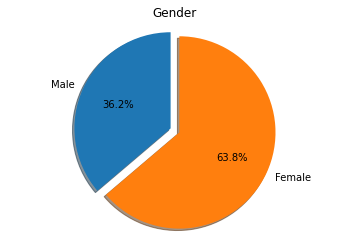

In [ ]:
# Draw pie chart (gender)
statGender = dfs['participants']['gender'].value_counts()
total = len(dfs['participants']['gender'])
figGender, axGender = plt.subplots()
labels = ['Male', 'Female']
sizes = [statGender['m'] / total, statGender['f'] / total]
explode = (0.1, 0)
axGender.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axGender.axis('equal')
axGender.set_title('Gender')
plt.show()

###Age


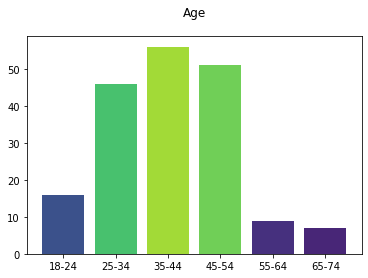

In [ ]:
# Age
statAge = dfs['participants']['age_range'].value_counts()
figAge, axAge = plt.subplots()

# Extract data from dataframe
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
values = [statAge['18-24'], statAge['25-34'], statAge['35-44'], statAge['45-54'], statAge['55-64'], statAge['65-74']]

# set colormap
cmap = plt.get_cmap("viridis") 
norm = plt.Normalize(vmin=0, vmax=65)

# plot bar chart
axAge.bar(labels, values, color=cmap(norm(values)))
axAge.set_title('Age', pad=20)
plt.show()

###Height

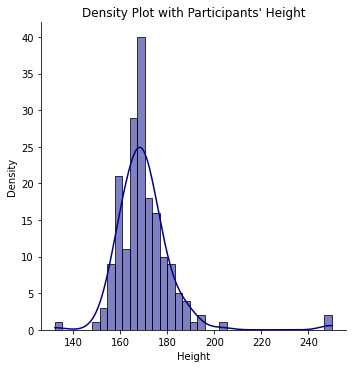

In [ ]:
# Height
sns.displot(dfs['participants']['height'], kde=True, 
             bins=int(len(dfs['participants'])/5), color = 'darkblue')
plt.title('Density Plot with Participants\' Height')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

###Weight

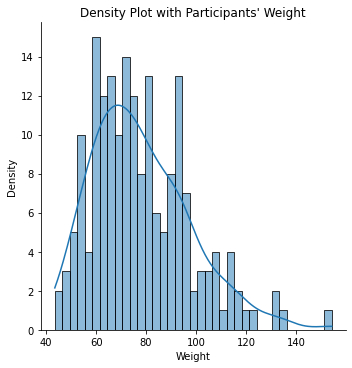

In [ ]:
# Weight
sns.displot(dfs['participants']['weight'], kde=True, 
             bins=int(len(dfs['participants'])/5))
plt.title('Density Plot with Participants\' Weight')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

##Blood Pressure Data
---
Next, we will look at the blood pressure data. It consists of the date and time of the measurement taken by a particular participant, and the corresponding diastolic and systolic reading. Some measurements also include indices such as the functional changes index, circulatory efficiency, kerdo vegetation index, and robinson index.

In [ ]:
print(dfs['blood_pressure'].head())

    user_code  measurement_datetime  diastolic  systolic  \
0  01bad5a519  2020-04-29  22:33:33        100       150   
1  01bad5a519  2020-04-30  01:33:33        100       150   
2  01bad5a519  2020-04-30  09:16:38         95       140   
3  01bad5a519  2020-04-30  12:16:38         95       140   
4  01bad5a519  2020-05-01  06:58:06         80       130   

   functional_changes_index  circulatory_efficiency  kerdo_vegetation_index  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                      3.38                  4545.0                     6.0   
3                       NaN                     NaN                     NaN   
4                      2.89                  4000.0                     NaN   

   robinson_index  
0             NaN  
1             NaN  
2           141.4  
3             NaN  
4           104.0  


Here, we plot the distribution of the Diastolic Blood Pressure and the Systolic Blood Pressure.

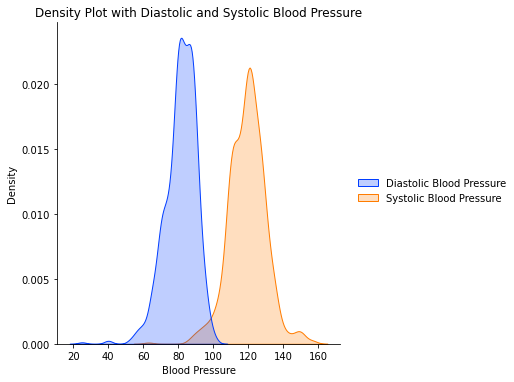

In [ ]:
# Blood Pressure
data = pd.DataFrame(data=np.c_[dfs['blood_pressure']['diastolic'], dfs['blood_pressure']['systolic']], columns=['Diastolic Blood Pressure'] + ['Systolic Blood Pressure'])
sns.displot(data=data, kind='kde', palette=sns.color_palette('bright')[:2], fill=True)
plt.title('Density Plot with Diastolic and Systolic Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.show()

##Heart Rate Data
---
In the heart rate data, it has the heart rate of each participant at a specific date and time, and an indicator of whether the participant is at rest.

In [ ]:
print(dfs['heart_rate'].head())

    user_code             datetime  heart_rate  is_resting
0  007b8190cf  2020-04-26 04:49:25          70           0
1  01bad5a519  2020-04-23 06:21:03          74           0
2  01bad5a519  2020-04-23 09:46:01          82           0
3  01bad5a519  2020-04-23 14:05:06          90           0
4  01bad5a519  2020-04-24 03:41:18          72           0


We can observe that the heart rate is significantly higher when the user is not resting.

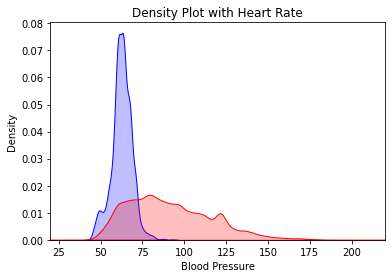

In [ ]:
# Extract Heart Rate for both is_resting states
df = dfs['heart_rate']
resting = df.loc[df['is_resting'] == 1]['heart_rate']
activity = df.loc[df['is_resting'] == 0]['heart_rate']

# Plot the heart rates onto the same plot
sns.kdeplot(resting, shade=True, color="b", label='resting')
sns.kdeplot(activity, shade=True, color="r", label='active')
plt.title('Density Plot with Heart Rate')
plt.xlim([20, 220])
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.show()

##Survey Data
---
In the survey data, the participants describe their severity level of COVID-19 related symptoms and some other health conditions. 

In [ ]:
print(dfs['surveys']['scale'].value_counts())

S_COVID_FATIGUE      209
S_COVID_COUGH        207
S_COVID_OVERALL      207
S_COVID_TROUBLE      206
S_COVID_BREATH       205
S_COVID_CONFUSION    204
S_COVID_PAIN         204
S_COVID_BLUISH       203
S_COVID_FEVER        203
S_CORONA              86
S_HRA_ALC             51
S_HRA_VIT             41
S_HRA_SLEEP           23
S_HRA_ANX             21
S_HEART               15
S_HRA_ALLERG          13
S_HRA_BONE            12
S_HRA_D               12
S_HRA_DEP             11
S_HRA_PANIC            9
S_HRA_LUNG             8
S_HRA_ASTHMA           7
S_HRA_NECK             7
S_HRA_ARR              6
S_HRA_VARI             6
S_HRA_COLDS            6
S_HRA_LIVER            5
S_HRA_CHOL             5
S_HRA_IRR              4
S_HRA_ANEMIA           4
S_HRA_POST             4
S_HRA_HEAD             4
S_COVID_SYMPTOMS       4
S_HRA_JOINT            4
S_HRA_SUGAR            4
S_HEART_1              3
S_DIAB_REASON3         3
S_HEART_3              3
S_HRA_LBP              3
S_DIABETES             3


The descriptions of each scale can be found at 'scales_description.csv'

In [ ]:
print(dfs['scales_description'].head())

              Scale                                       Description  Value  \
0  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      1   
1  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      2   
2  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      3   
3  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      4   
4     S_COVID_COUGH                       Symptom intensity: Coughing      1   

                           Meaning  
0                 Less than 3 days  
1                      3 to 6 days  
2                     7 to 14 days  
3                More than 14 days  
4  User isn’t experiencing symptom  


Here we plot the sum of the scores with respect to the 9 questions related to COVID-19 symptoms.

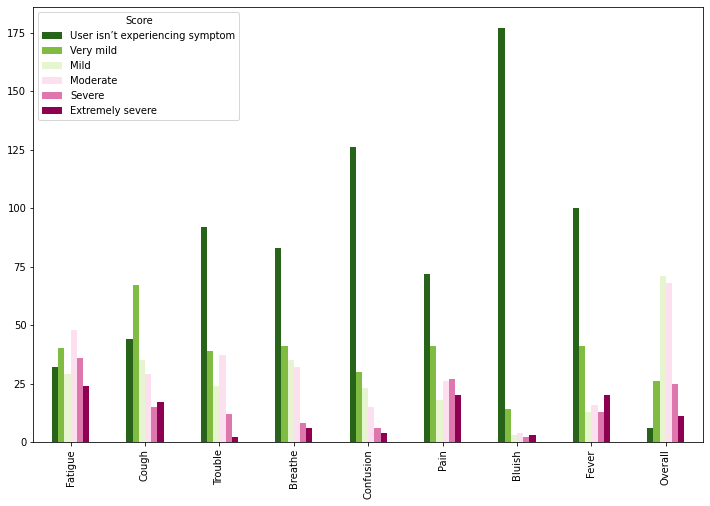

In [ ]:
df = dfs['surveys']

# Set labels of each item
labels = ['Fatigue','Cough','Trouble','Breathe','Confusion','Pain','Bluish','Fever','Overall']

# Retrieve statistic of the survey
covidFatigue = df.loc[df['scale'] == 'S_COVID_FATIGUE'].groupby(['value']).size()
covidCough = df.loc[df['scale'] == 'S_COVID_COUGH'].groupby(['value']).size()
covidTrouble = df.loc[df['scale'] == 'S_COVID_TROUBLE'].groupby(['value']).size()
covidBreathe = df.loc[df['scale'] == 'S_COVID_BREATH'].groupby(['value']).size()
covidConfusion = df.loc[df['scale'] == 'S_COVID_CONFUSION'].groupby(['value']).size()
covidPain = df.loc[df['scale'] == 'S_COVID_PAIN'].groupby(['value']).size()
covidBluish = df.loc[df['scale'] == 'S_COVID_BLUISH'].groupby(['value']).size()
covidFever = df.loc[df['scale'] == 'S_COVID_FEVER'].groupby(['value']).size()
covidOverall = df.loc[df['scale'] == 'S_COVID_OVERALL'].groupby(['value']).size()

# Plot grouped bar graph
dfAll = pd.concat([covidFatigue, covidCough, covidTrouble, covidBreathe, covidConfusion, covidPain, covidBluish, covidFever, covidOverall], axis=1).T
dfAll = dfAll.rename_axis('Score', axis='columns')
dfAll = dfAll.rename(columns={1: 'User isn’t experiencing symptom', 2: 'Very mild', 3: 'Mild', 4: 'Moderate', 5: 'Severe', 6: 'Extremely severe'})  
dfAll = dfAll.rename(index={0: 'Fatigue', 1: 'Cough', 2: 'Trouble', 3: 'Breathe', 4: 'Confusion', 5: 'Pain', 6: 'Bluish', 7: 'Fever', 8: 'Overall'})  
dfAll.plot(kind='bar', figsize=(12, 8), colormap='PiYG_r')
plt.show()

##Wearables Data
---
The wearables data contains information related to heart rate, body temperature, activity, calories etc.

In [ ]:
print(dfs['wearables'].head())

    user_code         day  resting_pulse  pulse_average  pulse_min  pulse_max  \
0  007b8190cf  2020-04-26            NaN           70.0       70.0       70.0   
1  01bad5a519  2020-02-12            NaN            NaN        NaN        NaN   
2  01bad5a519  2020-02-13            NaN            NaN        NaN        NaN   
3  01bad5a519  2020-02-15            NaN            NaN        NaN        NaN   
4  01bad5a519  2020-02-16            NaN            NaN        NaN        NaN   

   average_spo2_value  body_temperature_avg  stand_hours_total  steps_count  \
0                 NaN                   NaN                NaN          NaN   
1                 NaN                   NaN                NaN       8574.0   
2                 NaN                   NaN                NaN       7462.0   
3                 NaN                   NaN                NaN       2507.0   
4                 NaN                   NaN                NaN      10131.0   

   distance  steps_speed  total_number

Here we plot the heart rate against step speed. The correlation is not strong probably due to presence of various noise.

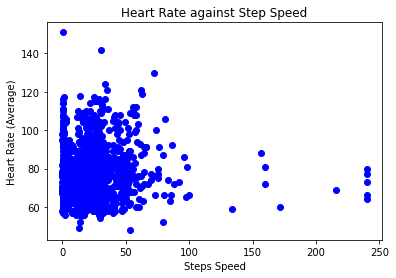

In [ ]:
# Extract calories and steps count
df = dfs['wearables'][['steps_speed', 'pulse_average']].dropna()
#print(df.value_counts())

plt.scatter(df['steps_speed'], df['pulse_average'], c ="blue")
plt.title('Heart Rate against Step Speed')
plt.xlabel('Steps Speed')
plt.ylabel('Heart Rate (Average)')
plt.show()

##Weather Data
---
The weather data describes the environment where the readings are measured. This includes the date, average temperature (celcius), atmospheric pressure, precipitation intensity, humidity, and clouds. 

In [ ]:
print(dfs['weather'].head())

    user_code         day  avg_temperature_C  atmospheric_pressure  \
0  013f6d3e5b  2020-05-22            18.0667                1017.6   
1  01bad5a519  2020-01-11            -1.2111                1016.4   
2  01bad5a519  2020-01-30             0.5056                1004.7   
3  01bad5a519  2020-04-02            -0.2444                 994.4   
4  01bad5a519  2020-04-12             5.1778                1016.1   

   precip_intensity  humidity  clouds  
0            0.0002      70.0    67.0  
1            0.0002      92.0     6.0  
2            0.0009      85.0   100.0  
3            0.0025      91.0    87.0  
4            0.0000      61.0    91.0  


The density plot for each item is plotted below.

###Average Temperature (Celcius)

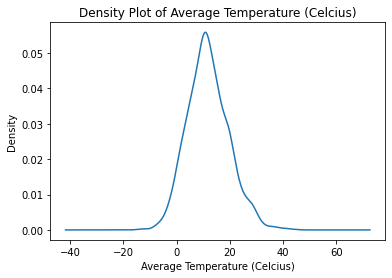

In [ ]:
ax = dfs['weather']['avg_temperature_C'].plot(kind='kde', title='Density Plot of Average Temperature (Celcius)')
ax.set_xlabel('Average Temperature (Celcius)')
plt.show()

###Atmospheric Pressure

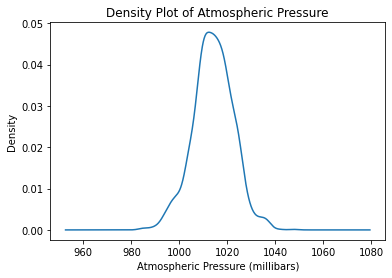

In [ ]:
ax = dfs['weather']['atmospheric_pressure'].plot(kind='kde', title='Density Plot of Atmospheric Pressure')
ax.set_xlabel('Atmospheric Pressure (millibars)')
plt.show()

###Precipitation Intensity

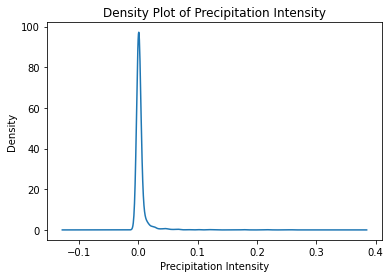

In [ ]:
ax = dfs['weather']['precip_intensity'].plot(kind='kde', title='Density Plot of Precipitation Intensity')
ax.set_xlabel('Precipitation Intensity')
plt.show()

###Humidity

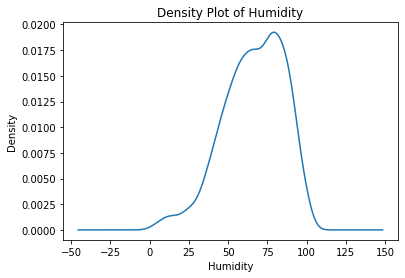

In [ ]:
ax = dfs['weather']['humidity'].plot(kind='kde', title='Density Plot of Humidity')
ax.set_xlabel('Humidity')
plt.show()

###Clouds

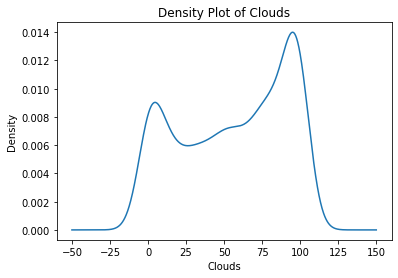

In [ ]:
ax = dfs['weather']['clouds'].plot(kind='kde', title='Density Plot of Clouds')
ax.set_xlabel('Clouds')
plt.show()